### Setup 

In [19]:
import pandas as pd
from pandas.io import sql
import sqlite3
import timeit
import matplotlib.pyplot as plt

import matplotlib.style as style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from matplotlib import rcParams

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

! pwd

/Users/nicholasbeaudoin/Desktop/ShotLink Analytics


### DB Query (Tiger Woods and Phil Mickelson from PGA Tour regular season 2003 - 2017)

In [2]:
# Create SQl DB connection
conn = sqlite3.connect('Shotlink.db')

In [314]:
df_03_17 = sql.read_sql("""SELECT * FROM PGA_stats 
                WHERE PlayerFullName = 'Woods, Tiger' 
                OR PlayerFullName = 'Mickelson, Phil'
                AND Year != "2018"
                """, con=conn)
print(len(df_03_17))

104479


In [315]:
df_03_17.head()

,Tour Code,TourDescription,Year,Tourn.#,Player#,Course#,PermanentTournament#,PlayerFirstName,PlayerLastName,Round,TournamentName,CourseName,Hole,HoleScore,ParValue,Yardage,Shot,ShotType(S/P/D),#ofStrokes,FromLocation(Scorer),FromLocation(Enhanced),To Location(Scorer),ToLocation(Enhanced),Distance,DistancetoPin,IntheHoleFlag,AroundtheGreenFlag,1stPuttFlag,DistancetoHoleaftertheShot,Time,Lie,Elevation,Slope,X Coordinate,Y Coordinate,Z Coordinate,DistancefromCenter,DistancefromEdge,Date,Left/Right,StrokesGained/Baseline,StrokesGainedCategory,RecoveryShot,PlayerFullName,DistanceYds,DistancetoPinYds,DistancetoHoleaftertheShotYds,DistancefromEdgeYds,DistanceFt,DistancetoPinFt,DistancetoHoleaftertheShotFt,DistancefromEdgeFt,CourseYardage
0,R,PGA TOUR,2003,030,01810,510,003,Phil,Mickelson,1,Phoenix Open,TPC Scottsdale,1,4.0,04,410,1,S,1,Tee Box,0,Fairway,Right Fairway,10086,0,N,N,0,4987,1227,Good,With,Level,"8,806.6890","11,704.9240","1,003.0570",00000,0,00/00/0000,0,0.0,0,0,"Mickelson, Phil",280,0,138,0,840.5,0.0,415.6,0.0,7089
1,R,PGA TOUR,2003,030,01810,510,003,Phil,Mickelson,1,Phoenix Open,TPC Scottsdale,1,4.0,04,410,2,S,1,Fairway,Right Fairway,Green,Green,5037,4987,N,N,0,172,1234,Good,With,Level,"8,563.9810","12,047.3700","1,005.9070",00000,0,00/00/0000,0,0.0,0,0,"Mickelson, Phil",139,138,4,0,419.8,415.6,14.3,0.0,7089
2,R,PGA TOUR,2003,030,01810,510,003,Phil,Mickelson,1,Phoenix Open,TPC Scottsdale,1,4.0,04,410,3,S,1,Green,Green,Green,Green,188,172,N,N,Y,22,1238,Good,With,Level,"8,579.2430","12,050.7360","1,005.9890",00000,0,00/00/0000,0,0.0,0,0,"Mickelson, Phil",5,4,0,0,15.7,14.3,1.8,0.0,7089
3,R,PGA TOUR,2003,030,01810,510,003,Phil,Mickelson,1,Phoenix Open,TPC Scottsdale,1,4.0,04,410,4,S,1,Green,Green,0,0,22,22,Y,N,0,0,1238,Good,With,Level,.0000,.0000,.0000,00000,0,00/00/0000,0,0.0,0,0,"Mickelson, Phil",0,0,0,0,1.8,1.8,0.0,0.0,7089
4,R,PGA TOUR,2003,030,01810,510,003,Phil,Mickelson,1,Phoenix Open,TPC Scottsdale,2,4.0,04,416,1,S,1,Tee Box,0,Primary Rough,Left Rough,12009,0,N,N,0,2550,1241,Good,With,Level,"8,842.4330","11,136.1480",991.2170,00000,0,00/00/0000,0,0.0,0,0,"Mickelson, Phil",333,0,70,0,1000.8,0.0,212.5,0.0,7089


# Tiger vs. Phil Putting (2003 - 2017)

Compare putts made from 2003-2017 PGA Tour regular season.

### Create percent made for each foot

In [320]:
feet_list = []
perc_list = []
made_list = []
try_list = []

player_list = []

players = set(df['PlayerFullName'])

for player in players:
    for i in range(1,61):    
        df_i_footers_try = df_03_17[(df_03_17['DistanceFt'] >= i) & (df_03_17['DistanceFt'] < (int(i)+1)) & (df_03_17['FromLocation(Scorer)'] == 'Green') & (df_03_17['PlayerFullName'] == player)]
        df_i_footers_make= df_03_17[(df_03_17['DistanceFt'] >= i) & (df_03_17['DistanceFt'] < (int(i)+1)) & (df_03_17['FromLocation(Scorer)'] == 'Green') & (df_03_17['IntheHoleFlag'] == 'Y') & (df_03_17['PlayerFullName'] == player)]

        percent_made_i = len(df_i_footers_make)/len(df_i_footers_try)

        feet_list.append(i)
        perc_list.append(percent_made_i)
        made_list.append(len(df_i_footers_make))
        try_list.append(len(df_i_footers_try))
        player_list.append(player)
        
# Convert zipped list to pandas DF
putts_df_03_17 = pd.DataFrame(list(zip(feet_list, perc_list, made_list, try_list, player_list)),
              columns=['feet','percent_made', 'number_made', 'number_attempt', 'player'])

putts_df_03_17['probability_make'] = putts_df_03_17['percent_made']*100

putts_df_03_17

,feet,percent_made,number_made,number_attempt,player,probability_make
0,1,0.999560,2271,2272,"Woods, Tiger",99.955986
1,2,0.994382,1770,1780,"Woods, Tiger",99.438202
2,3,0.986772,1119,1134,"Woods, Tiger",98.677249
3,4,0.951498,667,701,"Woods, Tiger",95.149786
4,5,0.874494,432,494,"Woods, Tiger",87.449393
5,6,0.748148,303,405,"Woods, Tiger",74.814815
6,7,0.549180,201,366,"Woods, Tiger",54.918033
7,8,0.495098,202,408,"Woods, Tiger",49.509804
8,9,0.448087,164,366,"Woods, Tiger",44.808743
9,10,0.453988,148,326,"Woods, Tiger",45.398773


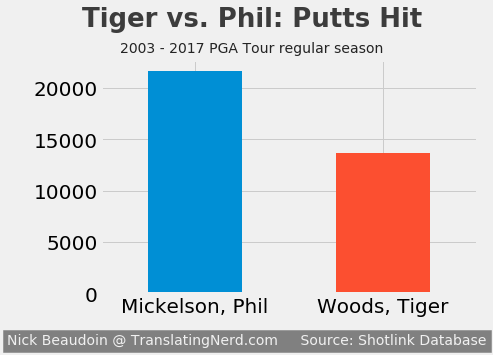

In [380]:
putts_df_03_17.groupby('player')['number_attempt'].sum().plot(kind='bar', legend = False, rot=0)


plt.tick_params(axis = 'both', which = 'major', labelsize = 20)
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

plt.text(x=-1, y=-5000, s = 'Nick Beaudoin @ TranslatingNerd.com     Source: Shotlink Database',                                                                    
    fontsize = 14, color = '#f0f0f0', backgroundcolor = 'grey')

plt.xlabel('')

plt.text(x = -.6, y = 26000, s = "Tiger vs. Phil: Putts Hit",
               fontsize = 26, weight = 'bold', alpha = .75)

plt.text(x = -.4, y = 23500, 
               s = '2003 - 2017 PGA Tour regular season',
              fontsize = 14, alpha = .85)

plt.show()

### Putting from < 60 feet

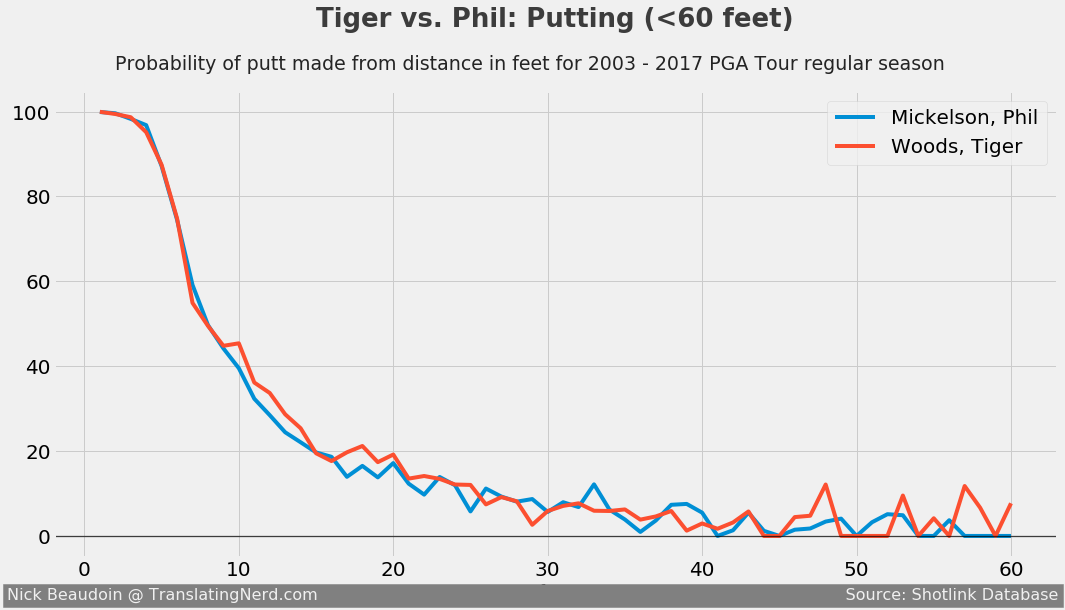

In [185]:
fig, ax = plt.subplots()

for key, grp in putts_df_03_17.groupby(['player']):
    ax = grp.plot(ax=ax, kind='line', x='feet', y='probability_make', figsize = (16,8), label=key, fontsize=12)

plt.legend(loc='best', fontsize=20)

plt.tick_params(axis = 'both', which = 'major', labelsize = 20)
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

plt.text(x=-5, y=-15, s = 'Nick Beaudoin @ TranslatingNerd.com                                                                                                       Source: Shotlink Database',                                                                    
    fontsize = 16, color = '#f0f0f0', backgroundcolor = 'grey')


plt.text(x = 8, y = 120, s = "            Tiger vs. Phil: Putting (<60 feet)",
               fontsize = 26, weight = 'bold', alpha = .75)
plt.text(x = 2, y = 110, 
               s = 'Probability of putt made from distance in feet for 2003 - 2017 PGA Tour regular season',
              fontsize = 19, alpha = .85)
plt.show()

### Putting from < 20 feet (2003-2018)

In [41]:
# Create under 20 feet DF
under_20 = putts_df[putts_df_03_17['feet'] <= 20]

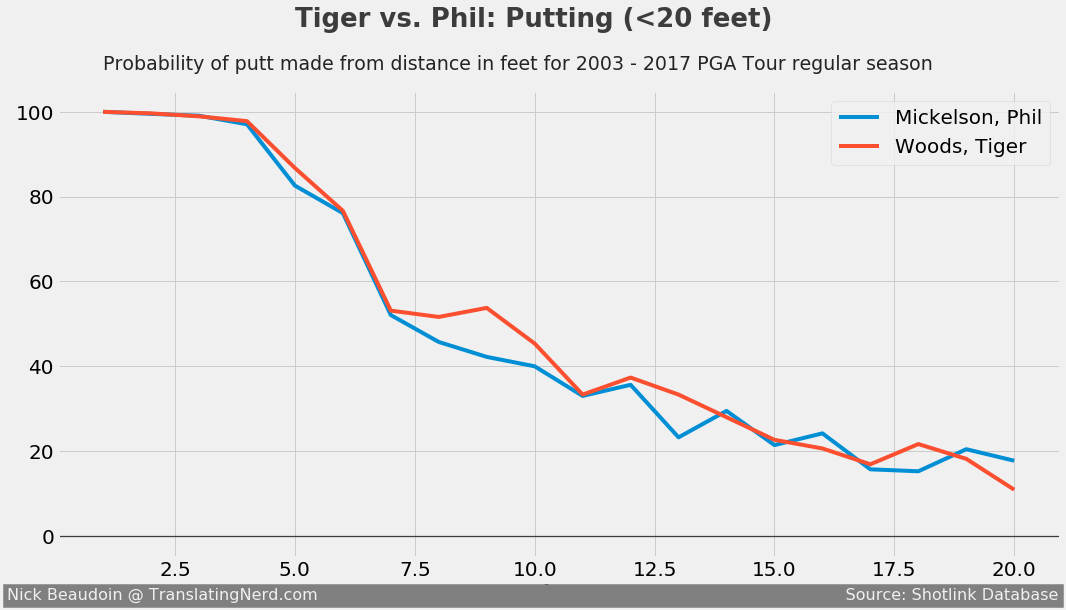

In [181]:
fig, ax = plt.subplots()

for key, grp in under_20.groupby(['player']):
    ax = grp.plot(ax=ax, kind='line', x='feet', y='probability_make', figsize = (16,8), label=key, fontsize=12)

plt.legend(loc='best', fontsize=20)

plt.tick_params(axis = 'both', which = 'major', labelsize = 20)
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

plt.text(x=-1, y=-15, s = 'Nick Beaudoin @ TranslatingNerd.com                                                                                                       Source: Shotlink Database',                                                                    
    fontsize = 16, color = '#f0f0f0', backgroundcolor = 'grey')


plt.text(x = 5, y = 120, s = "Tiger vs. Phil: Putting (<20 feet)",
               fontsize = 26, weight = 'bold', alpha = .75)
plt.text(x = 1, y = 110, 
               s = 'Probability of putt made from distance in feet for 2003 - 2017 PGA Tour regular season',
              fontsize = 19, alpha = .85)
plt.show()

### Best putter from 10 to 15 feet (2003 - 2017)

In [192]:
feet_list = []
perc_list = []
made_list = []
try_list = []
player_list = []

players = set(df['PlayerFullName'])

for player in players:  
    df_i_footers_try = df_03_17[(df_03_17['DistanceFt'] >= 0) & (df_03_17['DistanceFt'] < 15) & (df_03_17['FromLocation(Scorer)'] == 'Green') & (df_03_17['PlayerFullName'] == player)]
    df_i_footers_make= df_03_17[(df_03_17['DistanceFt'] >= 0) & (df_03_17['DistanceFt'] < 15) & (df_03_17['FromLocation(Scorer)'] == 'Green') & (df_03_17['IntheHoleFlag'] == 'Y') & (df_03_17['PlayerFullName'] == player)]

    percent_made_i = len(df_i_footers_make)/len(df_i_footers_try)

    feet_list.append(i)
    perc_list.append(percent_made_i)
    made_list.append(len(df_i_footers_make))
    try_list.append(len(df_i_footers_try))
    player_list.append(player)
        
# Convert zipped list to pandas DF
putts_df_03_17_inside_15 = pd.DataFrame(list(zip(feet_list, perc_list, made_list, try_list, player_list)),
              columns=['feet','percent_made', 'number_made', 'number_attempt', 'player'])

putts_df_03_17_inside_15['probability_make'] = putts_df_03_17_inside_15['percent_made']*100

putts_df_03_17_inside_15[['player', 'number_attempt', 'probability_make']]

,player,number_attempt,probability_make
0,"Woods, Tiger",11544,82.146570
1,"Mickelson, Phil",19790,79.858514


### Best putter from 6 - 10 feet (2003 - 2017)

In [201]:
feet_list = []
perc_list = []
made_list = []
try_list = []
player_list = []

players = set(df['PlayerFullName'])

for player in players:  
    df_i_footers_try = df_03_17[(df_03_17['DistanceFt'] >= 6) & (df_03_17['DistanceFt'] <= 10) & (df_03_17['FromLocation(Scorer)'] == 'Green') & (df_03_17['PlayerFullName'] == player)]
    df_i_footers_make= df_03_17[(df_03_17['DistanceFt'] >= 6) & (df_03_17['DistanceFt'] <= 10) & (df_03_17['FromLocation(Scorer)'] == 'Green') & (df_03_17['IntheHoleFlag'] == 'Y') & (df_03_17['PlayerFullName'] == player)]

    percent_made_i = len(df_i_footers_make)/len(df_i_footers_try)

    feet_list.append(i)
    perc_list.append(percent_made_i)
    made_list.append(len(df_i_footers_make))
    try_list.append(len(df_i_footers_try))
    player_list.append(player)
        
# Convert zipped list to pandas DF
putts_df_03_17_inside_15 = pd.DataFrame(list(zip(feet_list, perc_list, made_list, try_list, player_list)),
              columns=['feet','percent_made', 'number_made', 'number_attempt', 'player'])

putts_df_03_17_inside_15['probability_make'] = putts_df_03_17_inside_15['percent_made']*100

putts_df_03_17_inside_15[['player', 'number_attempt', 'probability_make']]

,player,number_attempt,probability_make
0,"Woods, Tiger",1571,56.397199
1,"Mickelson, Phil",2593,56.922484


### Best putter from between 10 to 15 feet in 2018

In [199]:
feet_list = []
perc_list = []
made_list = []
try_list = []
player_list = []

players = set(df['PlayerFullName'])

for player in players:  
    df_i_footers_try = df_03_17[(df_03_17['DistanceFt'] >= 10) & (df_03_17['DistanceFt'] <= 15) & (df_03_17['FromLocation(Scorer)'] == 'Green') & (df_03_17['PlayerFullName'] == player)]
    df_i_footers_make= df_03_17[(df_03_17['DistanceFt'] >= 10) & (df_03_17['DistanceFt'] <= 15) & (df_03_17['FromLocation(Scorer)'] == 'Green') & (df_03_17['IntheHoleFlag'] == 'Y') & (df_03_17['PlayerFullName'] == player)]

    percent_made_i = len(df_i_footers_make)/len(df_i_footers_try)

    feet_list.append(i)
    perc_list.append(percent_made_i)
    made_list.append(len(df_i_footers_make))
    try_list.append(len(df_i_footers_try))
    player_list.append(player)
        
# Convert zipped list to pandas DF
putts_df_03_17_inside_15 = pd.DataFrame(list(zip(feet_list, perc_list, made_list, try_list, player_list)),
              columns=['feet','percent_made', 'number_made', 'number_attempt', 'player'])

putts_df_03_17_inside_15['probability_make'] = putts_df_03_17_inside_15['percent_made']*100

putts_df_03_17_inside_15[['player', 'number_attempt', 'probability_make']]

,player,number_attempt,probability_make
0,"Woods, Tiger",1485,33.939394
1,"Mickelson, Phil",2485,30.020121


## Strokes gained on the green (2003 - 2017)

In [213]:
feet_list = []
strokes_gained_list = []
player_list = []

players = set(df['PlayerFullName'])

for player in players:
    for i in range(1,61):    
        strokes_gained = df_03_17[(df_03_17['DistanceFt'] >= i) & (df_03_17['DistanceFt'] < (int(i)+1)) & (df_03_17['FromLocation(Scorer)'] == 'Green') & (df_03_17['PlayerFullName'] == player)]['StrokesGained/Baseline'].mean()
        
        strokes_gained_list.append(strokes_gained)
        feet_list.append(i)
        player_list.append(player)
        
# Convert zipped list to pandas DF
strokes_gained_putting_df_03_17 = pd.DataFrame(list(zip(feet_list, strokes_gained_list, player_list)),
              columns=['feet', 'strokes_gained', 'player'])

strokes_gained_putting_df_03_17

,feet,strokes_gained,player
0,1,0.003985,"Woods, Tiger"
1,2,0.017346,"Woods, Tiger"
2,3,0.060773,"Woods, Tiger"
3,4,0.112233,"Woods, Tiger"
4,5,0.129731,"Woods, Tiger"
5,6,0.089393,"Woods, Tiger"
6,7,-0.046511,"Woods, Tiger"
7,8,-0.035081,"Woods, Tiger"
8,9,-0.022030,"Woods, Tiger"
9,10,0.040791,"Woods, Tiger"


Text(8,0.21,'Strokes gained putting during the 2003 - 2017 PGA Tour regular season')

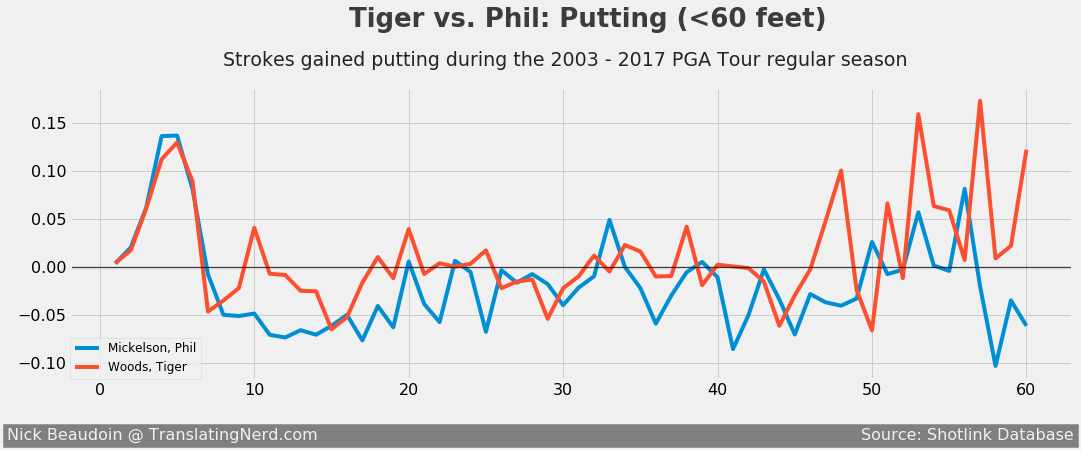

In [262]:
fig, ax = plt.subplots()

for key, grp in strokes_gained_putting_df_03_17.groupby(['player']):
    ax = grp.plot(ax=ax, kind='line', x='feet', y='strokes_gained', figsize = (16,5), label=key, fontsize=12)

plt.legend(loc=(0,0), fontsize=12)

plt.tick_params(axis = 'both', which = 'major', labelsize = 16)
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

plt.xlabel('')

plt.text(x=-6, y=-.18, s = 'Nick Beaudoin @ TranslatingNerd.com                                                                                                          Source: Shotlink Database',                                                                    
    fontsize = 16, color = '#f0f0f0', backgroundcolor = 'grey')



plt.text(x = 15, y = .25, s = "  Tiger vs. Phil: Putting (<60 feet)",
               fontsize = 26, weight = 'bold', alpha = .75)
plt.text(x = 8, y = .21,                s = 'Strokes gained putting during the 2003 - 2017 PGA Tour regular season',
              fontsize = 19, alpha = .85)

# plt.show()

## Strokes gained on the green from inside 20 feet (2003 - 2017)

In [290]:
feet_list = []
strokes_gained_list = []
player_list = []

players = set(df['PlayerFullName'])

for player in players:
    for i in range(1,21):    
        strokes_gained = df_03_17[(df_03_17['DistanceFt'] >= i) & (df_03_17['DistanceFt'] < (int(i)+1)) & (df_03_17['FromLocation(Scorer)'] == 'Green') & (df_03_17['PlayerFullName'] == player)]['StrokesGained/Baseline'].mean()
        
        strokes_gained_list.append(strokes_gained)
        feet_list.append(i)
        player_list.append(player)
        
# Convert zipped list to pandas DF
strokes_gained_putting_df_03_17 = pd.DataFrame(list(zip(feet_list, strokes_gained_list, player_list)),
              columns=['feet', 'strokes_gained', 'player'])

strokes_gained_putting_df_03_17

,feet,strokes_gained,player
0,1,0.003985,"Woods, Tiger"
1,2,0.017346,"Woods, Tiger"
2,3,0.060773,"Woods, Tiger"
3,4,0.112233,"Woods, Tiger"
4,5,0.129731,"Woods, Tiger"
5,6,0.089393,"Woods, Tiger"
6,7,-0.046511,"Woods, Tiger"
7,8,-0.035081,"Woods, Tiger"
8,9,-0.022030,"Woods, Tiger"
9,10,0.040791,"Woods, Tiger"


Text(3,0.17,'Strokes gained putting during the 2003 - 2017 PGA Tour regular season')

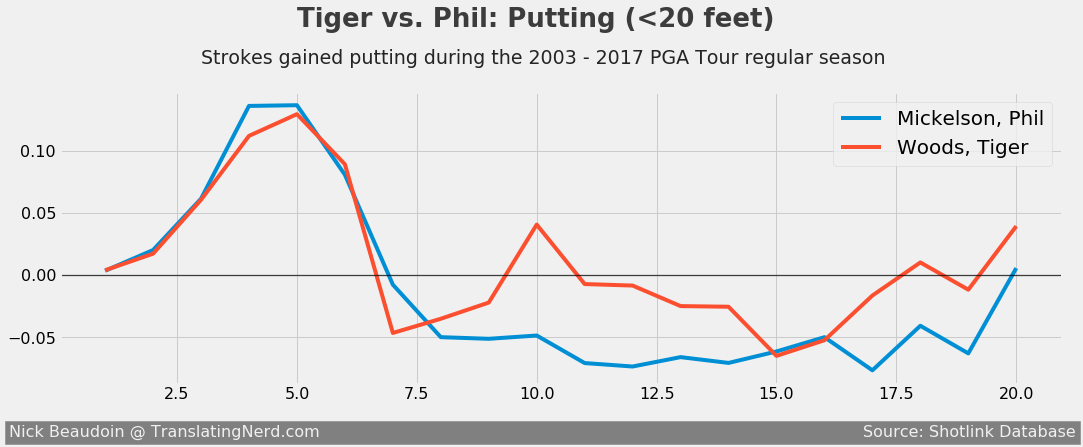

In [381]:
fig, ax = plt.subplots()

for key, grp in strokes_gained_putting_df_03_17.groupby(['player']):
    ax = grp.plot(ax=ax, kind='line', x='feet', y='strokes_gained', figsize = (16,5), label=key, fontsize=12)

plt.legend(loc=('upper right'), fontsize=20)

plt.tick_params(axis = 'both', which = 'major', labelsize = 16)
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

plt.xlabel('')

plt.text(x=-1, y=-.13, s = 'Nick Beaudoin @ TranslatingNerd.com                                                                                                          Source: Shotlink Database',                                                                    
    fontsize = 16, color = '#f0f0f0', backgroundcolor = 'grey')



plt.text(x = 5, y = .2, s = "Tiger vs. Phil: Putting (<20 feet)",
               fontsize = 26, weight = 'bold', alpha = .75)
plt.text(x = 3, y = .17,                s = 'Strokes gained putting during the 2003 - 2017 PGA Tour regular season',
              fontsize = 19, alpha = .85)

# plt.show()

# Tiger vs. Phil Putting (< 20 feet, 2003 - 2017)

Compare putts made from 2003-2017 PGA Tour regular season. There is not enough data to calcuate putts made outside of 20 feet since there will be putts that lie outside of 20 feet that each player did not encounter during the 2018 regular season. This is a low sample size issue.

### DB Query (Tiger Woods and Phil Mickelson from PGA Tour regular season 2018)

In [147]:
df_18 = sql.read_sql("""SELECT * FROM PGA_stats 
                WHERE Year = '2018' AND
                (PlayerFullName = 'Woods, Tiger' 
                OR PlayerFullName = 'Mickelson, Phil')
                """, con=conn)
print(len(df))

8648


In [148]:
df_18.head(100)

,Tour Code,TourDescription,Year,Tourn.#,Player#,Course#,PermanentTournament#,PlayerFirstName,PlayerLastName,Round,TournamentName,CourseName,Hole,HoleScore,ParValue,Yardage,Shot,ShotType(S/P/D),#ofStrokes,FromLocation(Scorer),FromLocation(Enhanced),To Location(Scorer),ToLocation(Enhanced),Distance,DistancetoPin,IntheHoleFlag,AroundtheGreenFlag,1stPuttFlag,DistancetoHoleaftertheShot,Time,Lie,Elevation,Slope,X Coordinate,Y Coordinate,Z Coordinate,DistancefromCenter,DistancefromEdge,Date,Left/Right,StrokesGained/Baseline,StrokesGainedCategory,RecoveryShot,PlayerFullName,DistanceYds,DistancetoPinYds,DistancetoHoleaftertheShotYds,DistancefromEdgeYds,DistanceFt,DistancetoPinFt,DistancetoHoleaftertheShotFt,DistancefromEdgeFt,CourseYardage
0,R,PGA TOUR,2018,010,01810,552,464,Phil,Mickelson,1,Safeway Open,Silverado Resort and Spa North,1,4.0,04,436,1,S,1,Tee Box,0,Primary Rough,Right Rough,10789,15480,N,N,N,4929,1242,Good,With,Level,"10,806.9350","9,553.0510",86.8810,01793,1333,10/05/2017,R,-0.067,Off the Tee,No,"Mickelson, Phil",299,430,136,37,899.1,1290.0,410.8,111.1,7166
1,R,PGA TOUR,2018,010,01810,552,464,Phil,Mickelson,1,Safeway Open,Silverado Resort and Spa North,1,4.0,04,436,2,S,1,Primary Rough,Right Rough,Green,Unmapped,4824,4929,N,N,N,117,1247,0,With,Level,"10,829.9090","9,954.3500",90.8820,00085,327,10/05/2017,L,0.505,Approach the Green,No,"Mickelson, Phil",134,136,3,9,402.0,410.8,9.8,27.2,7166
2,R,PGA TOUR,2018,010,01810,552,464,Phil,Mickelson,1,Safeway Open,Silverado Resort and Spa North,1,4.0,04,436,3,S,1,Green,Unmapped,Green,Unmapped,121,117,N,N,Y,13,1254,Good,With,Level,"10,827.3330","9,964.0730",91.0890,00010,361,10/05/2017,L,-0.390,Putting,No,"Mickelson, Phil",3,3,0,10,10.1,9.8,1.1,30.1,7166
3,R,PGA TOUR,2018,010,01810,552,464,Phil,Mickelson,1,Safeway Open,Silverado Resort and Spa North,1,4.0,04,436,4,S,1,Green,Unmapped,0,0,13,13,Y,N,N,0,1254,Good,With,Level,.0000,.0000,.0000,00000,0,10/05/2017,0,0.002,Putting,No,"Mickelson, Phil",0,0,0,0,1.1,1.1,0.0,0.0,7166
4,R,PGA TOUR,2018,010,01810,552,464,Phil,Mickelson,1,Safeway Open,Silverado Resort and Spa North,2,3.0,03,240,1,S,1,Tee Box,0,Green,Unmapped,7128,7308,N,N,N,326,1258,Good,With,Level,"10,208.1040","10,487.0950",99.8560,00264,313,10/05/2017,R,0.158,Approach the Green,No,"Mickelson, Phil",198,203,9,8,594.0,609.0,27.2,26.1,7166
5,R,PGA TOUR,2018,010,01810,552,464,Phil,Mickelson,1,Safeway Open,Silverado Resort and Spa North,2,3.0,03,240,2,S,1,Green,Unmapped,Green,Unmapped,321,326,N,N,Y,7,1304,Good,With,Level,"10,211.4400","10,513.6020",100.3760,00008,445,10/05/2017,R,-0.049,Putting,No,"Mickelson, Phil",8,9,0,12,26.8,27.2,0.6,37.1,7166
6,R,PGA TOUR,2018,010,01810,552,464,Phil,Mickelson,1,Safeway Open,Silverado Resort and Spa North,2,3.0,03,240,3,S,1,Green,Unmapped,0,0,7,7,Y,N,N,0,1305,Good,With,Level,.0000,.0000,.0000,00000,0,10/05/2017,0,0.001,Putting,No,"Mickelson, Phil",0,0,0,0,0.6,0.6,0.0,0.0,7166
7,R,PGA TOUR,2018,010,01810,552,464,Phil,Mickelson,1,Safeway Open,Silverado Resort and Spa North,3,4.0,04,424,1,S,1,Tee Box,0,Fairway,Left Fairway,10673,15588,N,N,N,4917,1309,Good,With,Level,"10,080.3650","11,087.5540",116.4130,00025,404,10/05/2017,L,0.180,Off the Tee,No,"Mickelson, Phil",296,433,136,11,889.4,1299.0,409.8,33.7,7166
8,R,PGA TOUR,2018,010,01810,552,464,Phil,Mickelson,1,Safeway Open,Silverado Resort and Spa North,3,4.0,04,424,2,S,1,Fairway,Left Fairway,Green,Unmapped,4994,4917,N,N,N,158,1314,Good,With,Level,"9,984.2390","11,492.2260",130.2010,00142,858,10/05/2017,L,0.143,Approach the Green,No,"Mickelson, Phil",138,136,4,23,416.2,409.8,13.2,71.5,7166
9,R,PGA TOUR,2018,010,01810,552,464,Phil,Mickelson,1,Safeway Open,Silverado Resort and Spa North,3,4.0,04,424,3,S,1,Green,Unmapped,Green,Unmapped,186,158,N,N,Y,25,1319,Good,With,Level,"9,998.9000","11,487.3020",129.6030,00017,672,10/05/2017,L,-0.276,Putting,No,"Mickelson, Phil",5,4,0,18,15.5,13.2,2.1,56.0,7166


In [149]:
feet_list = []
perc_list = []
made_list = []
try_list = []
player_list = []

players = set(df['PlayerFullName'])

for player in players:
    for i in range(1,21):
        df_i_footers_try = df_18[(df['DistanceFt'] >= i) & (df_18['DistanceFt'] < (int(i)+1)) & (df_18['FromLocation(Scorer)'] == 'Green') & (df_18['PlayerFullName'] == player)]
        df_i_footers_make= df_18[(df['DistanceFt'] >= i) & (df_18['DistanceFt'] < (int(i)+1)) & (df_18['FromLocation(Scorer)'] == 'Green') & (df_18['IntheHoleFlag'] == 'Y') & (df_18['PlayerFullName'] == player)]

        percent_made_i = len(df_i_footers_make)/len(df_i_footers_try)

        feet_list.append(i)
        perc_list.append(percent_made_i)
        made_list.append(len(df_i_footers_make))
        try_list.append(len(df_i_footers_try))
        player_list.append(player)
        
# Convert zipped list to pandas DF
putts_df_18 = pd.DataFrame(list(zip(feet_list, perc_list, made_list, try_list, player_list)),
              columns=['feet','percent_made', 'number_made', 'number_attempt', 'player'])

putts_df_18['probability_make'] = putts_df_18['percent_made']*100

putts_df_18

,feet,percent_made,number_made,number_attempt,player,probability_make
0,1,1.000000,229,229,"Woods, Tiger",100.000000
1,2,1.000000,145,145,"Woods, Tiger",100.000000
2,3,0.991150,112,113,"Woods, Tiger",99.115044
3,4,0.935897,73,78,"Woods, Tiger",93.589744
4,5,0.857143,42,49,"Woods, Tiger",85.714286
5,6,0.734694,36,49,"Woods, Tiger",73.469388
6,7,0.428571,15,35,"Woods, Tiger",42.857143
7,8,0.409091,18,44,"Woods, Tiger",40.909091
8,9,0.441860,19,43,"Woods, Tiger",44.186047
9,10,0.296296,8,27,"Woods, Tiger",29.629630


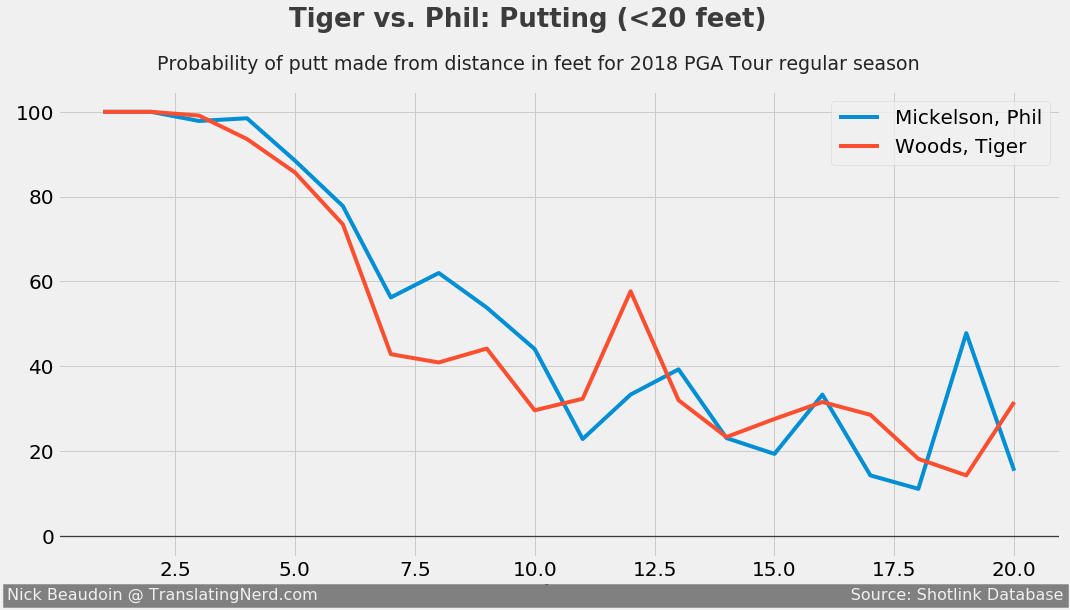

In [189]:
fig, ax = plt.subplots()

for key, grp in putts_df_18.groupby(['player']):
    ax = grp.plot(ax=ax, kind='line', x='feet', y='probability_make', figsize = (16,8), label=key, fontsize=12)

plt.legend(loc='best', fontsize=20)

plt.tick_params(axis = 'both', which = 'major', labelsize = 20)
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

plt.text(x=-1, y=-15, s = 'Nick Beaudoin @ TranslatingNerd.com                                                                                                        Source: Shotlink Database',                                                                    
    fontsize = 16, color = '#f0f0f0', backgroundcolor = 'grey')


plt.text(x = 4.5, y = 120, s = "  Tiger vs. Phil: Putting (<20 feet)",
               fontsize = 26, weight = 'bold', alpha = .75)
plt.text(x = 0, y = 110, 
               s = '                 Probability of putt made from distance in feet for 2018 PGA Tour regular season',
              fontsize = 19, alpha = .85)
plt.show()

### Best puttter inside 15 feet in 2018

In [193]:
feet_list = []
perc_list = []
made_list = []
try_list = []
player_list = []

players = set(df['PlayerFullName'])

for player in players:  
    df_i_footers_try = df_18[(df_18['DistanceFt'] >= 0) & (df_18['DistanceFt'] < 15) & (df_18['FromLocation(Scorer)'] == 'Green') & (df_18['PlayerFullName'] == player)]
    df_i_footers_make= df_18[(df_18['DistanceFt'] >= 0) & (df_18['DistanceFt'] < 15) & (df_18['FromLocation(Scorer)'] == 'Green') & (df_18['IntheHoleFlag'] == 'Y') & (df_18['PlayerFullName'] == player)]

    percent_made_i = len(df_i_footers_make)/len(df_i_footers_try)

    feet_list.append(i)
    perc_list.append(percent_made_i)
    made_list.append(len(df_i_footers_make))
    try_list.append(len(df_i_footers_try))
    player_list.append(player)
        
# Convert zipped list to pandas DF
putts_df_18_inside_15 = pd.DataFrame(list(zip(feet_list, perc_list, made_list, try_list, player_list)),
              columns=['feet','percent_made', 'number_made', 'number_attempt', 'player'])

putts_df_18_inside_15['probability_make'] = putts_df_18_inside_15['percent_made']*100

putts_df_18_inside_15[['player', 'number_attempt', 'probability_make']]

,player,number_attempt,probability_make
0,"Woods, Tiger",1113,82.479784
1,"Mickelson, Phil",1431,82.040531


Since this is not a sample, we can infer that this data represents the true population mean.

### Best putter from 6 - 10 feet (2018)

In [202]:
feet_list = []
perc_list = []
made_list = []
try_list = []
player_list = []

players = set(df['PlayerFullName'])

for player in players:  
    df_i_footers_try = df_18[(df_18['DistanceFt'] >= 6) & (df_18['DistanceFt'] <= 10) & (df_18['FromLocation(Scorer)'] == 'Green') & (df_18['PlayerFullName'] == player)]
    df_i_footers_make= df_18[(df_18['DistanceFt'] >= 6) & (df_18['DistanceFt'] <= 10) & (df_18['FromLocation(Scorer)'] == 'Green') & (df_18['IntheHoleFlag'] == 'Y') & (df_18['PlayerFullName'] == player)]

    percent_made_i = len(df_i_footers_make)/len(df_i_footers_try)

    feet_list.append(i)
    perc_list.append(percent_made_i)
    made_list.append(len(df_i_footers_make))
    try_list.append(len(df_i_footers_try))
    player_list.append(player)
        
# Convert zipped list to pandas DF
putts_df_18_inside_15 = pd.DataFrame(list(zip(feet_list, perc_list, made_list, try_list, player_list)),
              columns=['feet','percent_made', 'number_made', 'number_attempt', 'player'])

putts_df_18_inside_15['probability_make'] = putts_df_18_inside_15['percent_made']*100

putts_df_18_inside_15[['player', 'number_attempt', 'probability_make']]

,player,number_attempt,probability_make
0,"Woods, Tiger",173,51.445087
1,"Mickelson, Phil",212,61.792453


### Best putter from between 10 to 15 feet in 2018

In [198]:
feet_list = []
perc_list = []
made_list = []
try_list = []
player_list = []

players = set(df['PlayerFullName'])

for player in players:  
    df_i_footers_try = df_18[(df_18['DistanceFt'] >= 10) & (df_18['DistanceFt'] <= 15) & (df_18['FromLocation(Scorer)'] == 'Green') & (df_18['PlayerFullName'] == player)]
    df_i_footers_make= df_18[(df_18['DistanceFt'] >= 10) & (df_18['DistanceFt'] <= 15) & (df_18['FromLocation(Scorer)'] == 'Green') & (df_18['IntheHoleFlag'] == 'Y') & (df_18['PlayerFullName'] == player)]

    percent_made_i = len(df_i_footers_make)/len(df_i_footers_try)

    feet_list.append(i)
    perc_list.append(percent_made_i)
    made_list.append(len(f))
    try_list.append(len(df_i_footers_try))
    player_list.append(player)
        
# Convert zipped list to pandas DF
putts_df_18_inside_15 = pd.DataFrame(list(zip(feet_list, perc_list, made_list, try_list, player_list)),
              columns=['feet','percent_made', 'number_made', 'number_attempt', 'player'])

putts_df_18_inside_15['probability_make'] = putts_df_18_inside_15['percent_made']*100

putts_df_18_inside_15[['player', 'number_attempt', 'probability_make']]

,player,number_attempt,probability_make
0,"Woods, Tiger",142,34.507042
1,"Mickelson, Phil",185,34.594595


## Strokes gained on the green in 2018 (<60 feet)

In [264]:
feet_list = []
strokes_gained_list = []
player_list = []

players = set(df['PlayerFullName'])

for player in players:
    for i in range(1,61):    
        strokes_gained = df_18[(df_03_17['DistanceFt'] >= i) & (df_18['DistanceFt'] < (int(i)+1)) & (df_18['FromLocation(Scorer)'] == 'Green') & (df_18['PlayerFullName'] == player)]['StrokesGained/Baseline'].mean()
        
        strokes_gained_list.append(strokes_gained)
        feet_list.append(i)
        player_list.append(player)
        
# Convert zipped list to pandas DF
strokes_gained_putting_df_18 = pd.DataFrame(list(zip(feet_list, strokes_gained_list, player_list)),
              columns=['feet', 'strokes_gained', 'player'])

strokes_gained_putting_df_18

/Users/nicholasbeaudoin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


,feet,strokes_gained,player
0,1,0.002741,"Woods, Tiger"
1,2,0.008239,"Woods, Tiger"
2,3,0.018624,"Woods, Tiger"
3,4,0.026502,"Woods, Tiger"
4,5,0.034238,"Woods, Tiger"
5,6,0.040104,"Woods, Tiger"
6,7,0.023733,"Woods, Tiger"
7,8,0.012061,"Woods, Tiger"
8,9,0.006875,"Woods, Tiger"
9,10,0.006082,"Woods, Tiger"


Text(10,0.045,'Strokes gained putting during the 2018 PGA Tour regular season')

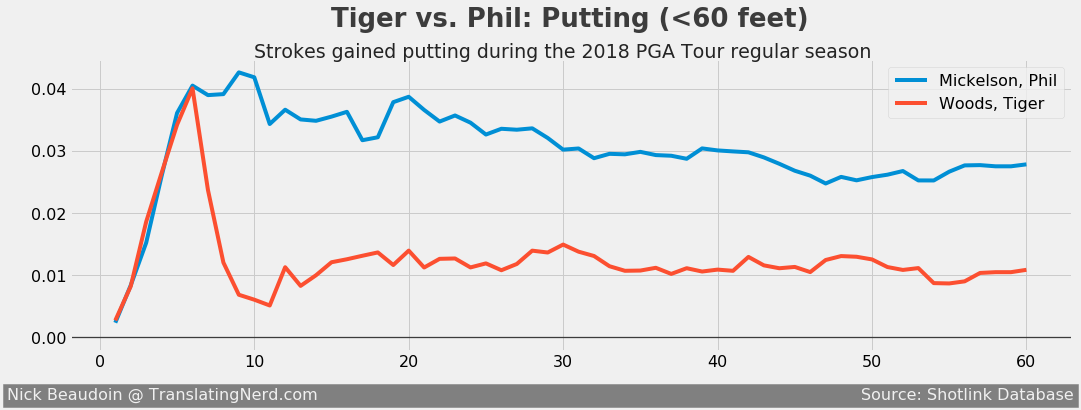

In [281]:
fig, ax = plt.subplots()

for key, grp in strokes_gained_putting_df_18.groupby(['player']):
    ax = grp.plot(ax=ax, kind='line', x='feet', y='strokes_gained', figsize = (16,5), label=key, fontsize=12)

plt.legend(loc=('upper right'), fontsize=16)

plt.tick_params(axis = 'both', which = 'major', labelsize = 16)
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

plt.xlabel('')

plt.text(x=-6, y=-.01, s = 'Nick Beaudoin @ TranslatingNerd.com                                                                                                          Source: Shotlink Database',                                                                    
    fontsize = 16, color = '#f0f0f0', backgroundcolor = 'grey')



plt.text(x = 15, y = .05, s = "Tiger vs. Phil: Putting (<60 feet)",
               fontsize = 26, weight = 'bold', alpha = .75)
plt.text(x = 10, y = .045,                s = 'Strokes gained putting during the 2018 PGA Tour regular season',
              fontsize = 19, alpha = .85)

# plt.show()

## Strokes gained on the green in 2018 (<20 feet)

In [ ]:
feet_list = []
strokes_gained_list = []
player_list = []

players = set(df['PlayerFullName'])

for player in players:
    for i in range(1,61):    
        strokes_gained = df_18[(df_03_17['DistanceFt'] >= i) & (df_18['DistanceFt'] < (int(i)+1)) & (df_18['FromLocation(Scorer)'] == 'Green') & (df_18['PlayerFullName'] == player)]['StrokesGained/Baseline'].mean()
        
        strokes_gained_list.append(strokes_gained)
        feet_list.append(i)
        player_list.append(player)
        
# Convert zipped list to pandas DF
strokes_gained_putting_df_18 = pd.DataFrame(list(zip(feet_list, strokes_gained_list, player_list)),
              columns=['feet', 'strokes_gained', 'player'])

strokes_gained_putting_df_18

In [282]:
feet_list = []
strokes_gained_list = []
player_list = []

players = set(df['PlayerFullName'])

for player in players:
    for i in range(1,21):    
        strokes_gained = df_18[(df_03_17['DistanceFt'] >= i) & (df_18['DistanceFt'] < (int(i)+1)) & (df_18['FromLocation(Scorer)'] == 'Green') & (df_18['PlayerFullName'] == player)]['StrokesGained/Baseline'].mean()
        
        strokes_gained_list.append(strokes_gained)
        feet_list.append(i)
        player_list.append(player)
        
# Convert zipped list to pandas DF
strokes_gained_putting_df_18 = pd.DataFrame(list(zip(feet_list, strokes_gained_list, player_list)),
              columns=['feet', 'strokes_gained', 'player'])

strokes_gained_putting_df_18

/Users/nicholasbeaudoin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


,feet,strokes_gained,player
0,1,0.002741,"Woods, Tiger"
1,2,0.008239,"Woods, Tiger"
2,3,0.018624,"Woods, Tiger"
3,4,0.026502,"Woods, Tiger"
4,5,0.034238,"Woods, Tiger"
5,6,0.040104,"Woods, Tiger"
6,7,0.023733,"Woods, Tiger"
7,8,0.012061,"Woods, Tiger"
8,9,0.006875,"Woods, Tiger"
9,10,0.006082,"Woods, Tiger"


Text(3,0.045,'Strokes gained putting during the 2018 PGA Tour regular season')

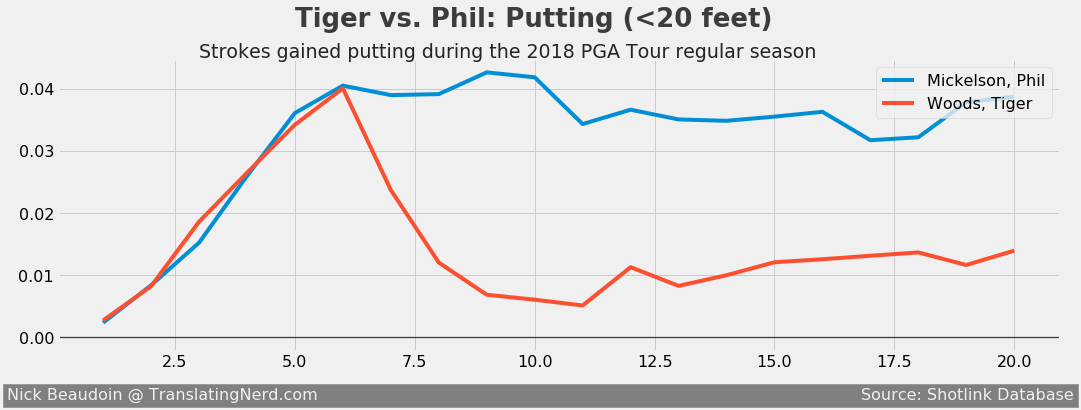

In [289]:
fig, ax = plt.subplots()

for key, grp in strokes_gained_putting_df_18.groupby(['player']):
    ax = grp.plot(ax=ax, kind='line', x='feet', y='strokes_gained', figsize = (16,5), label=key, fontsize=12)

plt.legend(loc=('upper right'), fontsize=16)

plt.tick_params(axis = 'both', which = 'major', labelsize = 16)
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

plt.xlabel('')

plt.text(x=-1, y=-.01, s = 'Nick Beaudoin @ TranslatingNerd.com                                                                                                          Source: Shotlink Database',                                                                    
    fontsize = 16, color = '#f0f0f0', backgroundcolor = 'grey')



plt.text(x = 5, y = .05, s = "Tiger vs. Phil: Putting (<20 feet)",
               fontsize = 26, weight = 'bold', alpha = .75)
plt.text(x = 3, y = .045,                s = 'Strokes gained putting during the 2018 PGA Tour regular season',
              fontsize = 19, alpha = .85)

# plt.show()